In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [18]:
ruta = "Imagen.tiff"
imagen = cv2.imread(ruta)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB) #Por alguna razón, cv2 lee las imagenes en BGR, así que hay que convertirlas a RGB
plt.imshow(imagen)

In [3]:
imagen.shape

(1024, 1024, 3)

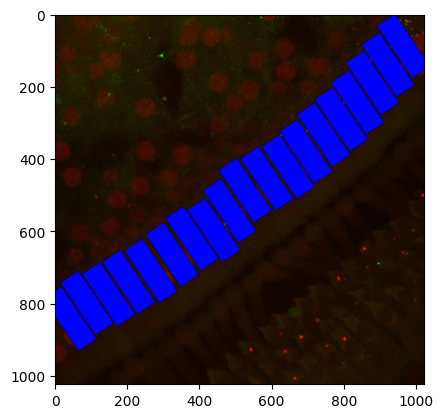

In [4]:
ruta = "Imagen_con_rectangulos.tif"
imagen_con_rectangulos = cv2.imread(ruta)
imagen_con_rectangulos = cv2.cvtColor(imagen_con_rectangulos, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_con_rectangulos)

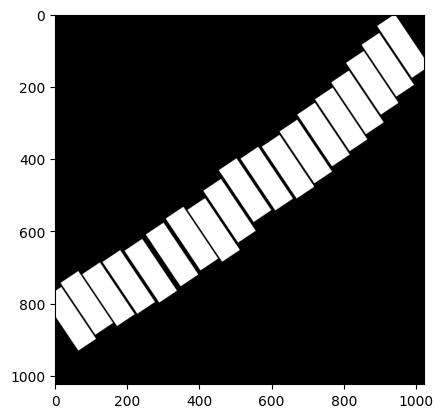

In [5]:
canal_azul = imagen_con_rectangulos[:,:,2]
plt.imshow(canal_azul, cmap='gray')

In [6]:


contornos_rectangulos, hierarchy = cv2.findContours(image = canal_azul, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_NONE)

In [7]:
len(contornos_rectangulos)

19

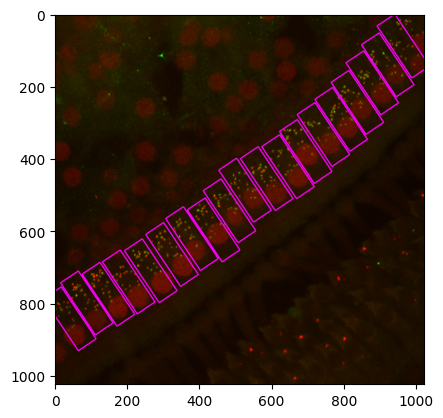

In [8]:
cv2.drawContours(image = imagen, contours = contornos_rectangulos, contourIdx = -1, color = (255,0,255), thickness = 2)
plt.imshow(imagen)

BORRAR A PARTIR DE ACÁ

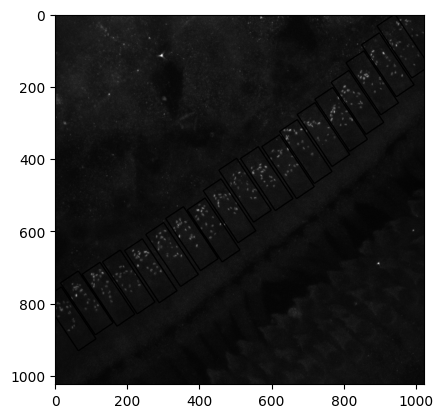

In [9]:
canal_verde = imagen[:,:,1]
plt.imshow(canal_verde, cmap='gray')

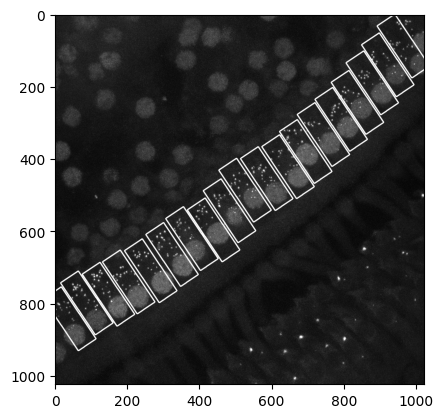

In [10]:
canal_rojo = imagen[:,:,0]
plt.imshow(canal_rojo, cmap='gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 5.0000e+00, 3.2000e+01, 1.5400e+02,
        4.3700e+02, 9.6900e+02, 1.9060e+03, 3.3060e+03, 4.8960e+03,
        7.0640e+03, 9.3350e+03, 1.2030e+04, 1.4764e+04, 1.7698e+04,
        2.0789e+04, 2.4323e+04, 2.6985e+04, 2.9759e+04, 3.2348e+04,
        3.4698e+04, 3.6032e+04, 3.7372e+04, 3.8111e+04, 3.8294e+04,
        3.7970e+04, 3.7580e+04, 3.6066e+04, 3.5202e+04, 3.3573e+04,
        3.1614e+04, 2.9673e+04, 2.8147e+04, 2.5688e+04, 2.3909e+04,
        2.2051e+04, 1.9802e+04, 1.8232e+04, 1.6490e+04, 1.4843e+04,
        1.3701e+04, 1.2581e+04, 1.1307e+04, 1.0296e+04, 9.4740e+03,
        8.4690e+03, 7.7570e+03, 7.1740e+03, 6.6880e+03, 6.2870e+03,
        5.8960e+03, 5.3990e+03, 5.0650e+03, 4.6520e+03, 4.3610e+03,
        4.1140e+03, 3.8460e+03, 3.5910e+03, 3.4640e+03, 3.2780e+03,
        3.1020e+03, 2.8950e+03, 2.8390e+03, 2.5940e+03, 2.5400e+03,
        2.4510e+03, 2.2200e+03, 2.2080e+03, 2.01

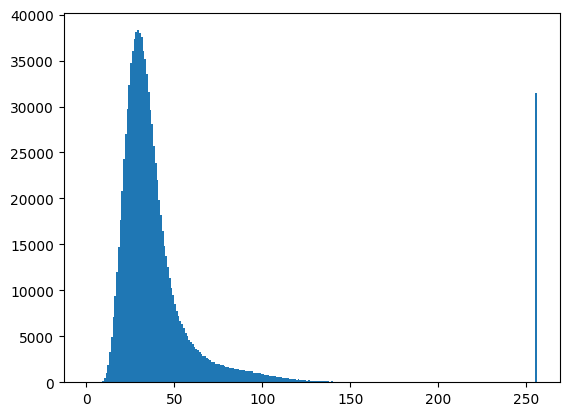

In [11]:
#plt.imshow(canal_rojo, cmap='gray')
#hist for canal rojo
plt.hist(canal_rojo.ravel(),256,[0,256])

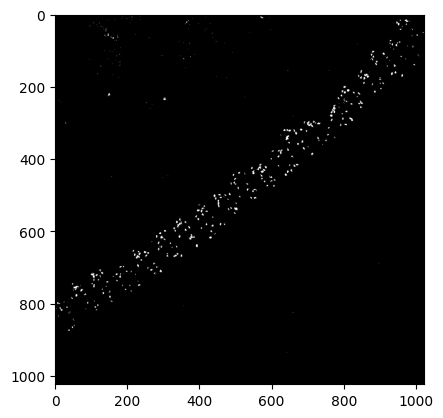

In [12]:
# crear una imagen solo donde el canal verde y rojo sean positivos al mismo tiempo
imagen_verde_bin = canal_verde > 50
imagen_rojo_bin = canal_rojo > 50

imagen_bin = np.logical_and(imagen_verde_bin, imagen_rojo_bin)
plt.imshow(imagen_bin, cmap='gray')


In [13]:
%matplotlib qt



In [14]:
imagen_bin_uint8 = (imagen_bin * 255).astype(np.uint8)

contornos_synapses, _ = cv2.findContours(
    imagen_bin_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)



In [43]:
#dibujamos las dinapsis en la imagen original
cv2.drawContours(imagen , contornos_synapses, -1, (255, 255, 255), 1)
plt.imshow(imagen )

In [16]:
punto = tuple(contornos_synapses[0][0][0])
punto

(641, 936)

In [17]:
contornos_rectangulos[0]

array([[[ 16, 755]],

       [[ 15, 756]],

       [[ 14, 757]],

       [[ 13, 757]],

       [[ 12, 758]],

       [[ 11, 759]],

       [[ 10, 759]],

       [[  9, 760]],

       [[  8, 761]],

       [[  7, 761]],

       [[  6, 762]],

       [[  5, 763]],

       [[  4, 763]],

       [[  3, 764]],

       [[  2, 765]],

       [[  1, 765]],

       [[  0, 766]],

       [[  0, 767]],

       [[  0, 768]],

       [[  0, 769]],

       [[  0, 770]],

       [[  0, 771]],

       [[  0, 772]],

       [[  0, 773]],

       [[  0, 774]],

       [[  0, 775]],

       [[  0, 776]],

       [[  0, 777]],

       [[  0, 778]],

       [[  0, 779]],

       [[  0, 780]],

       [[  0, 781]],

       [[  0, 782]],

       [[  0, 783]],

       [[  0, 784]],

       [[  0, 785]],

       [[  0, 786]],

       [[  0, 787]],

       [[  0, 788]],

       [[  0, 789]],

       [[  0, 790]],

       [[  0, 791]],

       [[  0, 792]],

       [[  0, 793]],

       [[  0, 794]],

       [[ 

In [36]:
len(contornos_synapses)

508

In [41]:
contorno = contornos_rectangulos[0]

sinapsis_adentro = 0

for i in range(len(contornos_synapses)) :

    x = int(contornos_synapses[i][0][0][0])
    y = int(contornos_synapses[i][0][0][1])
    
    esta = cv2.pointPolygonTest(contorno, (x, y) , False)
    
    if esta > 0:
        sinapsis_adentro += 1

In [42]:
sinapsis_adentro

17

In [19]:
cv2.drawContours(image = imagen, contours = contornos_rectangulos[14], contourIdx = -1, color = (255,0,255), thickness = 2)

cv2.drawContours(image = imagen, contours = contornos_synapses[250], contourIdx = -1, color = (255,0,255), thickness = 2)
plt.imshow(imagen)

NameError: name 'dtype' is not defined

In [31]:
x = int(contornos_synapses[250][0][0][0])
y = int(contornos_synapses[250][0][0][1])

cv2.pointPolygonTest(contorno, (791, 303), False)

1.0